# <center> Short files description </center>
The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbanked population. Predicting whether or not a client will repay a loan or have difficulty is a critical business need, and Home Credit is hosting this competition on Kaggle to see what sort of models the machine learning community can develop to help them in this task.

There are 7 different sources of data:

- <b> application_train/application_test</b>: the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature 
- <b>SK_ID_CURR</b>: The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.
- <b>bureau</b>: data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
- <b>bureau_balance</b>: monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
- <b>previous_application</b>: previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
- <b>POS_CASH_BALANCE</b>: monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
- <b>credit_card_balance</b>: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a - - credit card balance, and a single credit card can have many rows.
- <b>installments_payment</b>: payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

This diagram shows how all of the data is related:
<img src=https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png> </img>

# <center> Data import </center>
There are actually 9 files: 1 of them is training data, 1 is testing data, 1 is a submission file and the rest are containing additional information about each loan.

In [1]:
# basic libraries import
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Training data import
app_train = pd.read_csv("application_train.csv")
print("The shape of training data:",app_train.shape)
app_train.head()

The shape of training data: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Testing data import
app_test = pd.read_csv("application_test.csv")
print("The shape of testing data:",app_test.shape)
app_test.head()

The shape of testing data: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The training has 307511 observations and 122 features when testing data has 48744 observations and 121 features. (The difference is because of TARGET which is being explained)

# <center> EDA </center>

<center>First of all we should examine how does the target column look like.</center>

In [4]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

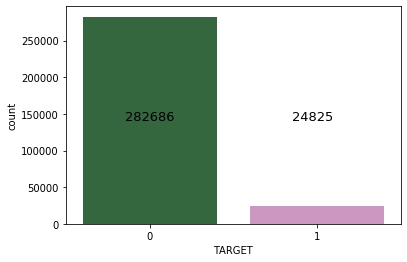

In [5]:
ax = sns.countplot(x=app_train['TARGET'], palette = 'cubehelix')

height_zeros = len(app_train[app_train['TARGET'] == 0])
                   
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.25, height_zeros/2), fontsize = 13, color = 'black')

As we can see from the chart, there is such a class imbalance. There are much more loans that were repaid on time than loans that were not repaid. 

# <center> Missing values </center>

In [6]:
def missing_values_frame(df):
    
    # Total missing values
    mis_sum = df.isnull().sum()
    
    # Total pct missing values
    mis_pct_values = 100*mis_sum/len(df)
    
    table_mv = pd.concat([mis_sum, mis_pct_values],axis = 1)
    table_mv.sort_values(by = 1, ascending = False, inplace = True)
    table_mv.rename(columns = {0:'Missing data', 1:'Percentage of missing data'}, inplace = True)
    table_mv = table_mv[table_mv.iloc[:,1] != 0].round(2)
    
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"                  
           "There are " + str(table_mv.shape[0]) +
              " columns that have missing values.")
    
    return table_mv

In [7]:
miss_values_table = missing_values_frame(app_train)
miss_values_table.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing data,Percentage of missing data
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35


One way of dealing with missing values is to fill them properly using various techniques (imputation). Another option would be to drop columns with a high percentage of missing values, although it is impossible to know if these columns will be helpful to our model. Therefore, I am going to keep all of the columns for now.

# <center>Column types and encoding variables</center>

<center> It is necessary to deal with categorical variables, features which type is float64 and int64 are numerical variables. We don't have to change anything with them. (except filling the missing values) </center>

In [8]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [9]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### In this project i am going to use one-hot encoding to deal with categorical variables. 

In [10]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training shape:', app_train.shape)
print('Testing shape:', app_test.shape)

Training shape: (307511, 246)
Testing shape: (48744, 242)


As we can see there is a difference in the columns so lets drop the unneccesary columns. 

In [11]:
train_labels = app_train['TARGET']

app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
app_train['TARGET'] =  train_labels

print('Training shape:', app_train.shape)
print('Testing shape:', app_test.shape)

Training shape: (307511, 243)
Testing shape: (48744, 242)


Now the training and testing dataset has the same ammout of features. The number of feature has increased since I have used one hot encoding which creates additional columns due to the number of unique values. 

# <center>Anomalies</center>

In [12]:
# Searching for anomalies
for i in range(0,243):
    if app_train.iloc[:,i].max() > 10:
        print(app_train.iloc[:,i].describe())

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75

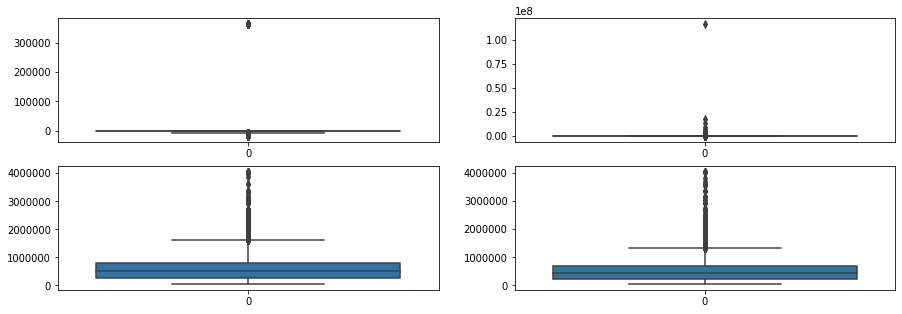

In [13]:
# Boxplots of features that are suspected of having anomalies 

fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(figsize = (15,5), nrows = 2, ncols = 2)
sns.boxplot(ax = ax1, data = app_train['DAYS_EMPLOYED'])
sns.boxplot(ax = ax2, data = app_train['AMT_INCOME_TOTAL'])
sns.boxplot(ax = ax3, data = app_train['AMT_CREDIT'])
sns.boxplot(ax = ax4, data = app_train['AMT_GOODS_PRICE'])

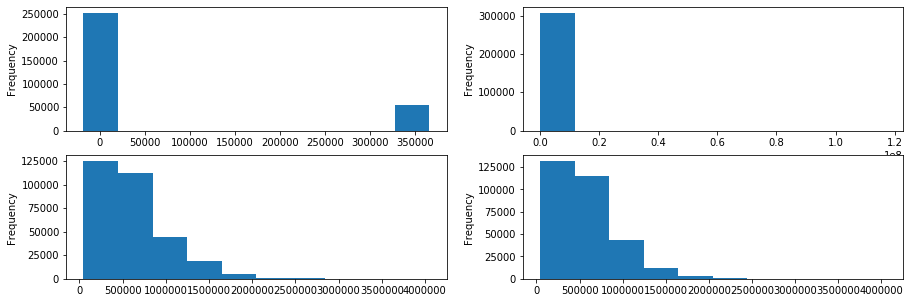

In [14]:
# Histograms of features that are suspected of having anomalies 

fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(figsize = (15,5), nrows = 2, ncols = 2)
app_train['DAYS_EMPLOYED'].plot.hist(ax = ax1)
app_train['AMT_INCOME_TOTAL'].plot.hist(ax = ax2)
app_train['AMT_CREDIT'].plot.hist(ax = ax3)
app_train['AMT_GOODS_PRICE'].plot.hist(ax = ax4)

As we can notice, there are at least 1 feature that need our intervention. In that case, I am going to replace values in the 'DAYS_EMPLOYED' columns which are supposed to be anomalies.

In [15]:
outlier_train = app_train[app_train['DAYS_EMPLOYED'] == 365243]
outlier_test = app_test[app_test['DAYS_EMPLOYED'] == 365243]

print('Number of anomalies in the train data', outlier_train.shape[0])
print('Number of anomalies in the test data', outlier_test.shape[0])

Number of anomalies in the train data 55374
Number of anomalies in the test data 9274


In [16]:
app_train['DAYS_EMPLOYED'].replace({365243:np.NaN}, inplace = True)
app_test['DAYS_EMPLOYED'].replace({365243:np.NaN}, inplace = True)

Now it should look much better. 

In [17]:
app_train['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

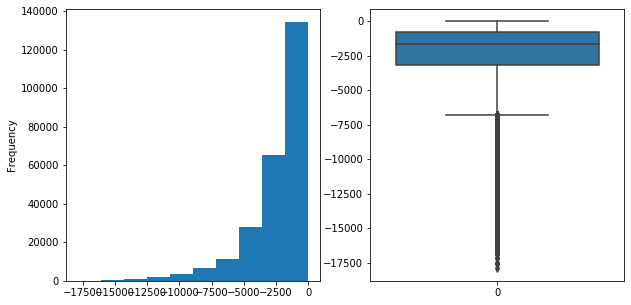

In [18]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), nrows = 1, ncols = 2)

sns.boxplot(data = app_train['DAYS_EMPLOYED'], ax = ax2)
app_train['DAYS_EMPLOYED'].plot.hist(ax = ax1)

# <center> Correlations </center>

In [19]:
# Find correlations with the target
correlations = app_train.corr()['TARGET'].sort_values()
corr = app_train.corr()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

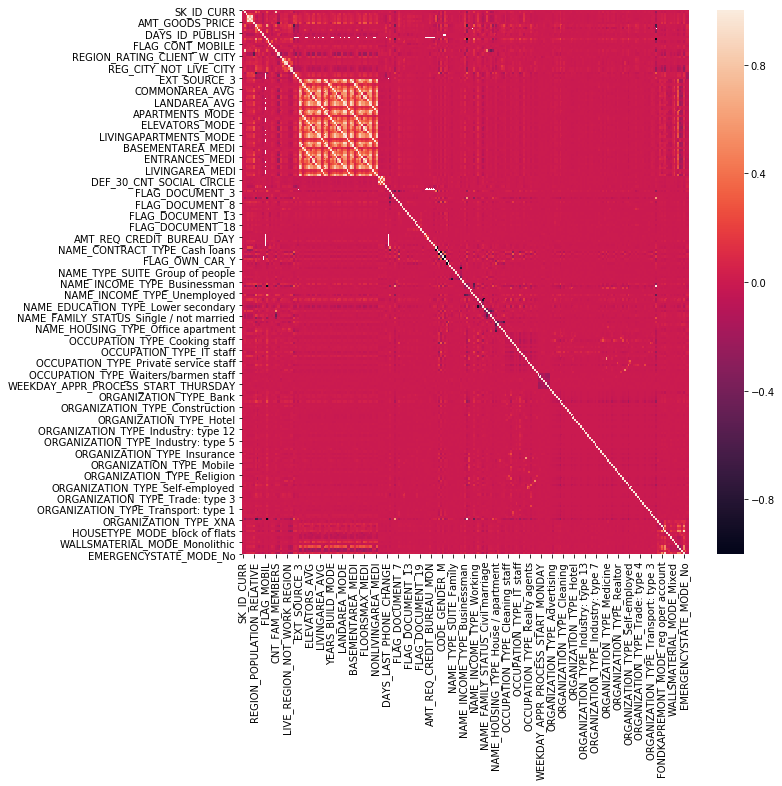

In [20]:
fig = plt.subplots(figsize = (10,10))
sns.heatmap(corr)

Concluding, the most positive correlation has a feature called 'DAYS_BIRTH' and the most negative 'EXT_SOURCE_3'. Actually, the 'DAYS_BIRTH' feature is telling us about the age in days of the client at the time of the loan in negative days. The correlation is positive but all the values are negative. Let's make it a bit clearer to explain.

In [21]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

When we take the absolute value of the 'DAYS_BIRTH' column, the correlation changes. Now it is negative. It can be explained as: If people get older there are more likely to pay the loans on time. 

Text(0, 0.5, 'Count')

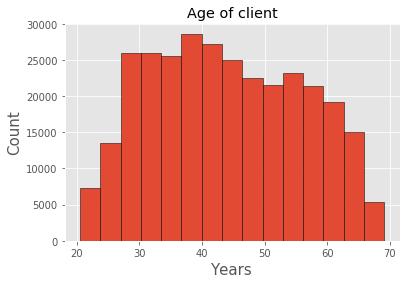

In [22]:
plt.style.use('ggplot')

plt.hist(app_train['DAYS_BIRTH']/365, edgecolor='k',bins = 15)
plt.title('Age of client'); plt.xlabel('Years', fontsize = 15); plt.ylabel('Count', fontsize = 15)

From the previous plot we can get the information about the number of people at each age that have recently got the loan. 

(Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Destiny'),
 Text(0.5, 1.0, 'Age distribution plot'))

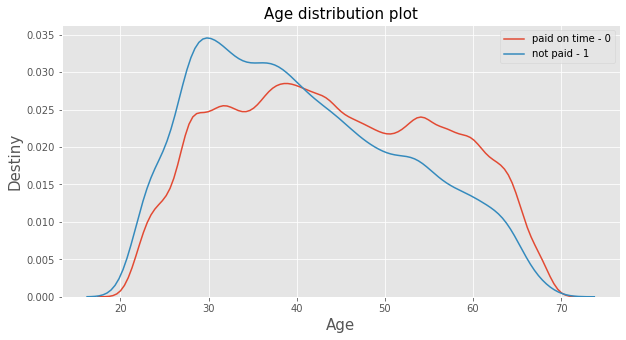

In [23]:
fig = plt.subplots(figsize = (10,5))

sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH']/365, label = 'paid on time - 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH']/365, label = 'not paid - 1')

plt.xlabel('Age', fontsize = 15), plt.ylabel('Destiny', fontsize = 15), plt.title('Age distribution plot', fontsize = 15)

The target variable is going up pretty fast at the younger age as we thought. 

# <center> Logistic regression implementation</center>

In [24]:
from sklearn.preprocessing import MinMaxScaler, Imputer

if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
test = app_test.copy()
features = list(train.columns)

imputer = Imputer(strategy = 'median')
scaler = MinMaxScaler(feature_range = (0,1))

imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(test)

scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)

print('Training shape', train.shape)
print('Testing shape', test.shape)

C:\Users\Mateusz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Training shape (307511, 242)
Testing shape (48744, 242)


In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 1, solver='liblinear')

log_reg.fit(train, train_labels)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Lets make some prediction on our model.

In [26]:
log_reg_pred = log_reg.predict_proba(test)
log_reg_pred = log_reg_pred[:,1]

In [27]:
pred_table = app_test[['SK_ID_CURR']]
pred_table['PROBABILITIES'] = log_reg_pred
pred_table.head()

C:\Users\Mateusz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,PROBABILITIES
0,100001,0.051362
1,100005,0.195394
2,100013,0.035899
3,100028,0.031416
4,100038,0.111798


### <center> Score </center>

<center> Checking out the roc and auc score on the training dataset. </center>

In [28]:
from sklearn.metrics import roc_auc_score 
predicted_train = log_reg.predict_proba(train)[:,1]
roc_auc_score(train_labels, predicted_train)

0.7486076691200487

# <center> Hyperparameter tunning </center>

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

grid_params = [{'C': [0.0001, 0.001, 0.01, 0.1, 1]}]

clf = GridSearchCV(log_reg, param_grid = grid_params, scoring='roc_auc')
clf.fit(train, train_labels)

C:\Users\Mateusz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [30]:
print("Best parameters set:", clf.best_params_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("\n%0.3f (+/- %0.3f) for %r" % (mean, std*2, params))

Best parameters set: {'C': 1}

0.677 (+/- 0.003) for {'C': 0.0001}

0.729 (+/- 0.005) for {'C': 0.001}

0.742 (+/- 0.006) for {'C': 0.01}

0.744 (+/- 0.005) for {'C': 0.1}

0.745 (+/- 0.005) for {'C': 1}


It is noticable that the higher parameter we get, the better is the roc_auc score.

# <center> Saving predictions </center>

In [32]:
pred_table.to_csv('log_reg_pred.csv', index = False)